In [1]:
#Import libraries 
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path to Instacart Basket Analysis 
path = r'/Users/libertyonia/Documents/Instacart Basket Analysis'

In [3]:
#import ords_prods_merge_4.8.pkl file from last exercise 
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_merge_4.8.pkl'))

In [4]:
#check the columns of the ords_prods_merge dataframe 
ords_prods_merge.head(5)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_dspo,order_behavior
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average hours,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
1,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average hours,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average hours,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
3,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average hours,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
4,3367565,1,prior,6,2,7,19.0,196,1,1,...,Mid-range product,Regularly busy,Regularly busy,Average hours,10,New customer,6.372222,Low spender,20.5,Non-frequent customer


<Axes: >

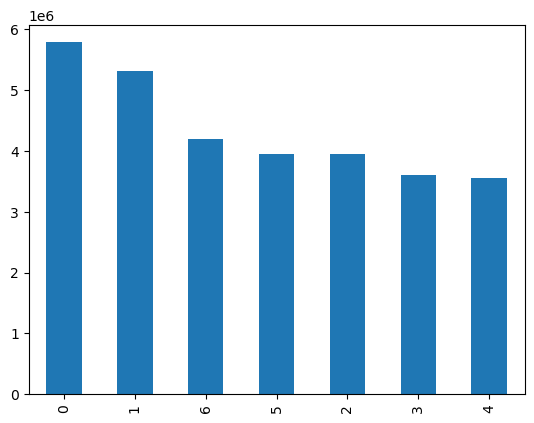

In [5]:
#create bar plot from the order_day_of_week column 
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

In [6]:
#Sort the bars according to index order rather than smallest to largest
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

0    5779087
1    5303718
2    3947564
3    3600589
4    3554531
5    3952326
6    4190948
Name: order_day_of_week, dtype: int64

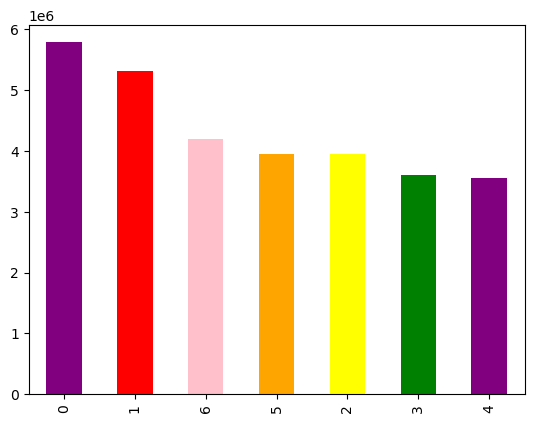

In [7]:
#Add color to the bar chart
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink', 'orange','yellow','green'])

In [8]:
#export the bar chart as a visualization
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_order_dow.png'))

# Histogram 

<Axes: ylabel='Frequency'>

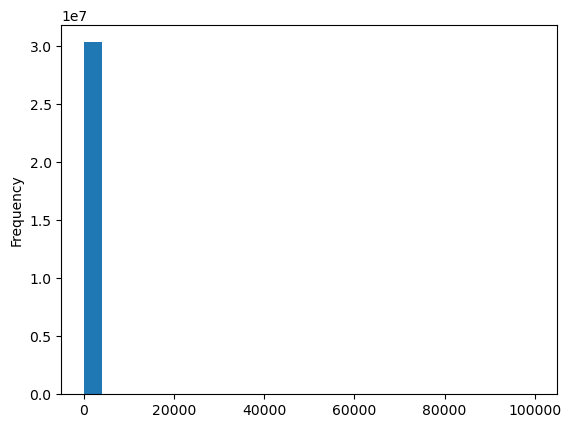

In [10]:
#create a histogram of the prices column 
ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
#Max price is $9,999 is pushing most of the values to the left 
ords_prods_merge['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

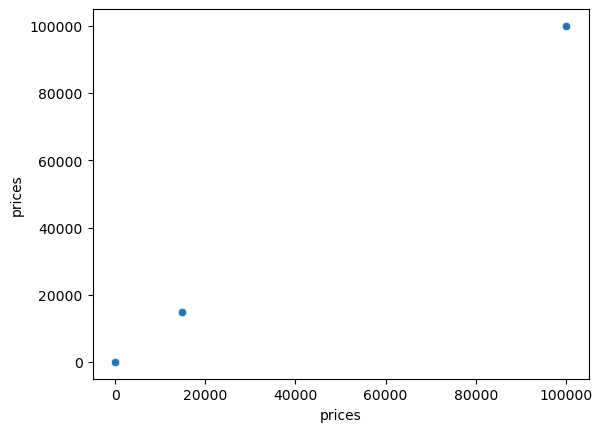

In [14]:
#scatterplot of the prices column 
#Max value at 99,999
#Another large value around 20,000
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
#running a check to locate the ords larger than 100 
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_dspo,order_behavior
8960343,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Busiest hours,40,Regular customer,109.670103,High spender,5.0,Frequent customer
8960344,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Average hours,40,Regular customer,109.670103,High spender,5.0,Frequent customer
8960345,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average hours,4,New customer,1250.245833,High spender,12.0,Regular customer
8960346,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,Average hours,4,New customer,1250.245833,High spender,12.0,Regular customer
8960347,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average hours,16,Regular customer,120.090909,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27128304,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,Average hours,39,Regular customer,1137.802260,High spender,4.0,Frequent customer
27128305,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,Average hours,39,Regular customer,1137.802260,High spender,4.0,Frequent customer
27128306,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Slowest days,Average hours,15,Regular customer,487.075120,High spender,5.0,Frequent customer
27128307,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Slowest days,Average hours,12,Regular customer,1235.679755,High spender,12.0,Regular customer


In [16]:
#This code will drop outliers by marking them as NaNs 
#The command looks for values above 100 within the “prices” column and assigns them a value. In this case, that new value is np.nan.
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
#Check a change by looking at the max value 
ords_prods_merge['prices'].max()

25.0

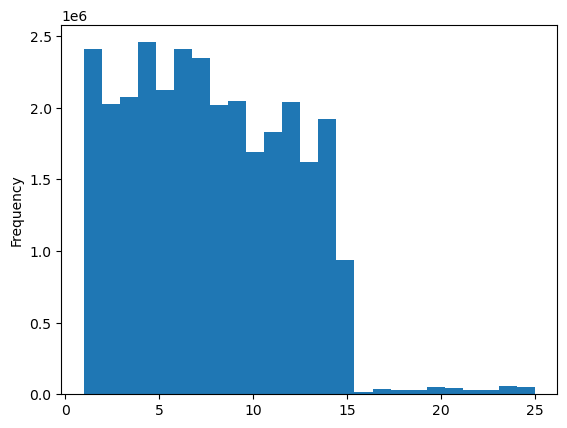

In [19]:
#histogram after cleaning 
hist_prices = ords_prods_merge['prices'].plot.hist(bins=25)

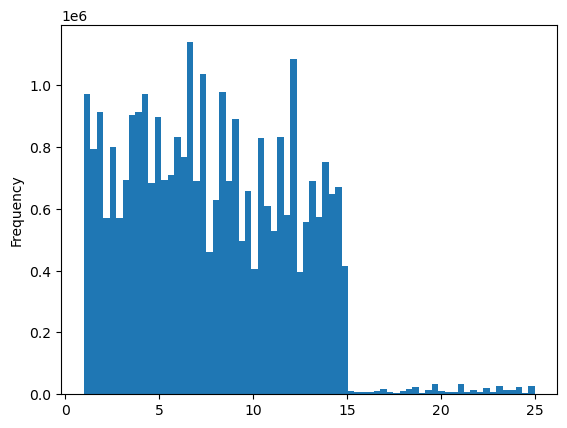

In [22]:
#histogram with 70 bins 
hist_prices = ords_prods_merge['prices'].plot.hist(bins=70)

In [23]:
#Export histogram of 'prices' column 
hist_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_histogram.png'))

In [32]:
#np.random.seed() ensure that the the random pattern is reproducible 
#np.random.rand(len(ords_prods_merge)) will randomly assign values between 0 and 1 according to the length of ords_prods_merge 
#<= 0.7 will compare the random numbers resulting in a list of True or False
x = np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7
dev

array([False,  True, False, ...,  True, False,  True])

In [33]:
#Store values that are True into big 
big = ords_prods_merge[dev]

In [34]:
#Store values that are False into small 
small = ords_prods_merge[~dev]

In [35]:
#Check the lens of the ords_prods_merge dataframe 
len(ords_prods_merge)

30328763

In [36]:
#Check the len of the big and small datasets 
len(small) + len(big)

30328763

In [38]:
#store small dataframe into a subset containing only two columns 
df_2 = small[['order_day_of_week', 'prices']]

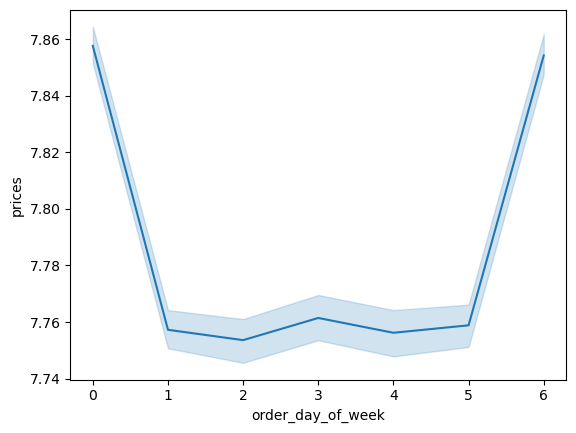

In [39]:
#create line plot of df_2
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [44]:
#Export df_2 small line chart
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line.png'))